# Linear Least Squares on real world data

## Simplest case


We will consider simple real example of linear regression on World Bank data.

In [ ]:
# World bank data https://data.worldbank.org/
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataset = pd.read_csv('https://raw.githubusercontent.com/MerkulovDaniil/sber21_fmin/sources/data/world_bank_data.csv')
dataset.head()

,Country,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import,Export,Corruption,GovEff,PolSta,adult_mortality,Male,Female
0,Afghanistan,AFG,1960,59.773194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,AUS,1960,1807.785710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,AUT,1960,935.460427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Burundi,BDI,1960,70.051735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,BEL,1960,1273.691659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Suppose, we are given the set of $m$ pairs $(x_i, y_i)_{i=1}^m$. We are to construct linear predictions of the following form:

$$
y_i^{pred} = k x_i
$$

We will start with the simple example of Import/Export prediction:

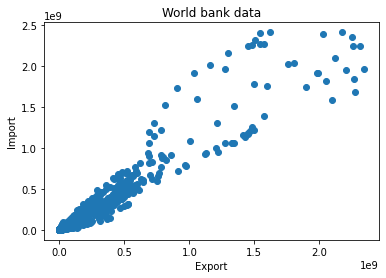

In [ ]:
y_variable = 'Import'
x_variable = 'Export'
clean_data = dataset[[x_variable, y_variable]].dropna()
plt.scatter(clean_data[x_variable], clean_data[y_variable])
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('World bank data')
plt.show()

We need to select hyperparameters $k$, that minimize sum of squared errors:

$$ \tag{Loss}
L(k) = \sum\limits_{i=1}^m (y_i^{pred} - y_i)^2 = \sum\limits_{i=1}^m (kx_i - y_i)^2 \to \min_{k \in \mathbb{R}}
$$

Write down the following derivative of the loss function:
* $\frac{\partial L}{\partial k} = $

Find the optimal value of $k$ from setting the corresponding derivative to zero:
* $\frac{\partial L}{\partial k} = 0 \rightarrow k = \ldots$

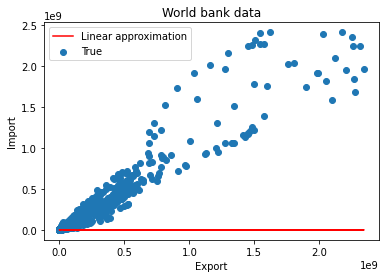

In [ ]:
y_variable = 'Import'
x_variable = 'Export'

clean_data = dataset[[x_variable, y_variable]].dropna()

x_data = clean_data[x_variable]
y_data = clean_data[y_variable]

#=== Write down optimal k here ===
k = 0
#=================================
y_pred = k*x_data

plt.scatter(x_data, y_data, label = 'True')
plt.plot(x_data, y_pred, 'r-', label = 'Linear approximation')

plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('World bank data')
plt.legend()
plt.show()

Let's compare with the built-in implementation:

In [ ]:
A = np.vstack([x_data, np.ones(len(x_data))]).T
k, b = np.linalg.lstsq(A, y_data, rcond=None)[0]
print(f'k = {k}, b = {b}')

k = 1.0312958739168514, b = -923609.0654769217


Analytic results: k = 0
Numpy results: k = 1.0312958739168514, b = -923609.0654769217


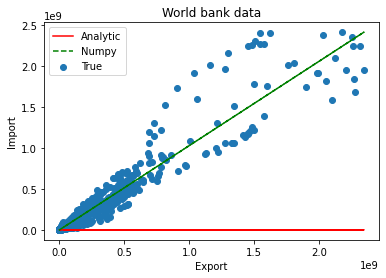

In [ ]:
y_variable = 'Import'
x_variable = 'Export'

clean_data = dataset[[x_variable, y_variable]].dropna()

x_data = clean_data[x_variable]
y_data = clean_data[y_variable]

#=== Write down optimal k here ===
k = 0
print(f'Analytic results: k = {k}')
#=================================
y_pred = k*x_data

A = np.vstack([x_data, np.ones(len(x_data))]).T
k_np, b_np = np.linalg.lstsq(A, y_data, rcond=None)[0]
print(f'Numpy results: k = {k_np}, b = {b_np}')

plt.scatter(x_data, y_data, label = 'True')
plt.plot(x_data, y_pred, 'r-', label = 'Analytic')
plt.plot(x_data, k_np*x_data + b_np, 'g--', label = 'Numpy')

plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('World bank data')
plt.legend()
plt.show()

What is the biggest difference between two approaches above?

## "Nonlinear" linear least squares

Let's take a look at the following graph:

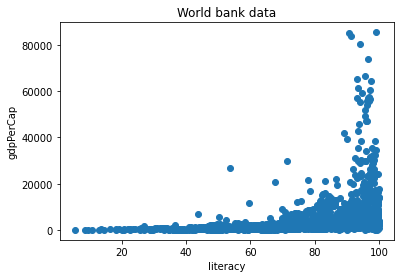

In [ ]:
y_variable = 'gdpPerCap'
x_variable = 'literacy'

clean_data = dataset[[x_variable, y_variable]].dropna()

x_data = clean_data[x_variable]
y_data = clean_data[y_variable]

plt.scatter(x_data, y_data)
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('World bank data')
plt.show()

Explain how one can use linear regression to solve this problem? Note, that direct using of code above is not acceptable, because the data on the graph are not linearly dependent.

In [ ]:
# Your code here